In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("ppp_transformed_updated.csv")
df_original = df.copy()
df.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'SBAOfficeCode',
       'ProcessingMethod', 'BorrowerName', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatus', 'Term', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'FranchiseName', 'ServicingLenderName',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'BusinessType', 'Gender', 'Veteran',
       'TOTAL_PROCEED', 'PROCEED_Diff', 'UTILITIES_PROCEED_pct',
       'PAYROLL_PROCEED_pct', 'MORTGAGE_INTEREST_PROCEED_pct',
       'RENT_PROCEED_pct', 'REFINANCE_EIDL_PROCEED_pct',
       'HEALTH_CARE_PROCEED_pct', 'DEBT_INTEREST_PROCEED_pct',
       'PROCEED_Per_Job', 'isAfterBiden', 'isDiffBorrowerAndProjectCity',
       'Industry', 'Subsector', 'ProcessingMethod_encoded',
       'LoanStatus_encoded', 'RuralUrbanIndicator_encoded',
       'HubzoneIndicator_encoded', 'LMIIndi

In [3]:
def term_transform(row):
    """
    Transforms 'Term' column into a new column with categorical (string) values
    > 60  : more than 60
    == 60 : 60
    > 24  : between 24 and 60
    == 24 : 24
    < 24  : less than 24 
    """
    if row > 60:
        label = 'more_than_60'
    elif row == 60:
        label = 'is_60'
    elif row > 24:
        label = 'between_24_60'
    elif row == 24:
        label = 'is_24'
    else:
        label = 'less_than_24'
    return label
# transform Term column into categorical
df['Term_cat'] = df['Term'].apply(term_transform)
df[['Term', 'Term_cat']].head(5)

,Term,Term_cat
0,24,is_24
1,24,is_24
2,24,is_24
3,24,is_24
4,24,is_24


In [4]:
big = ['InitialApprovalAmount','CurrentApprovalAmount','TOTAL_PROCEED','PROCEED_Per_Job','JobsReported']

for var in big:
    #df[f'log_{var}'] = np.log(df[var]) 
    df[f'log_{var}'] = [np.log(x) if x > 0 else 0 for x in df[var]]

log_to_standardise = ['log_InitialApprovalAmount','log_CurrentApprovalAmount', 'log_TOTAL_PROCEED','log_PROCEED_Per_Job','log_JobsReported']

scaler = StandardScaler()

for field in log_to_standardise:
    df[f'{field}_standardised'] = scaler.fit_transform(df[[field]])

In [5]:
payroll_scaler = StandardScaler()

df['payroll_over_other'] = np.log((1+df['PAYROLL_PROCEED_pct'])/(1+df[['UTILITIES_PROCEED_pct','MORTGAGE_INTEREST_PROCEED_pct','RENT_PROCEED_pct',
                                                                       'REFINANCE_EIDL_PROCEED_pct','HEALTH_CARE_PROCEED_pct','DEBT_INTEREST_PROCEED_pct'
                                                                       ]].sum(axis=1)))

df['payroll_over_other'] = payroll_scaler.fit_transform(df['payroll_over_other'].values.reshape((-1, 1)))

In [6]:
# list of encoded variables
encoded = ['ProcessingMethod_encoded','LoanStatus_encoded','RuralUrbanIndicator_encoded','HubzoneIndicator_encoded','LMIIndicator_encoded',
           'BusinessAgeDescription_encoded','Race_encoded','Ethnicity_encoded','BusinessType_encoded','Gender_encoded','Veteran_encoded','Industry_encoded']

# list of existing standardised variables
standardised = ['Term_standardised','JobsReported_standardised','PROCEED_Diff_standardised','UTILITIES_PROCEED_pct_standardised','PAYROLL_PROCEED_pct_standardised',
                'MORTGAGE_INTEREST_PROCEED_pct_standardised','RENT_PROCEED_pct_standardised','REFINANCE_EIDL_PROCEED_pct_standardised','HEALTH_CARE_PROCEED_pct_standardised',
                'DEBT_INTEREST_PROCEED_pct_standardised','InitialApprovalAmount_scaled_standardised','CurrentApprovalAmount_scaled_standardised','TOTAL_PROCEED_scaled_standardised',
                'PROCEED_Per_Job_scaled_standardised']

# list of log_transformed variables
logged = ['log_InitialApprovalAmount','log_CurrentApprovalAmount','log_TOTAL_PROCEED','log_PROCEED_Per_Job','log_JobsReported']

# list of log_transformed_standardised variables
log_standardise = ['log_InitialApprovalAmount_standardised','log_CurrentApprovalAmount_standardised','log_TOTAL_PROCEED_standardised',
                   'log_PROCEED_Per_Job_standardised','log_JobsReported_standardised']

# list of pct variables
pct = ['PAYROLL_PROCEED_pct','UTILITIES_PROCEED_pct','MORTGAGE_INTEREST_PROCEED_pct','RENT_PROCEED_pct','REFINANCE_EIDL_PROCEED_pct','HEALTH_CARE_PROCEED_pct','DEBT_INTEREST_PROCEED_pct']

# list of commonly dropped varibles (please feel free to use your own)
# drop = ['Unnamed: 0', 'LoanNumber','DateApproved','SBAOfficeCode','BorrowerName','BorrowerCity','BorrowerZip','Term','InitialApprovalAmount','CurrentApprovalAmount',
#         'FranchiseName','ServicingLenderName','ServicingLenderZip','BusinessAgeDescription', 'ProjectCity','NAICSCode','TOTAL_PROCEED','PROCEED_Diff']
drop = ['LoanNumber','DateApproved','SBAOfficeCode','BorrowerName','BorrowerCity','BorrowerZip','Term','InitialApprovalAmount','CurrentApprovalAmount',
        'FranchiseName','ServicingLenderName','ServicingLenderZip', 'ProjectCity','NAICSCode','TOTAL_PROCEED','PROCEED_Diff', 'Subsector', 'BusinessType']
# original dataframe from ppp_transformed_updated.csv
# df_original

# original dataframe with Term transformation, log transformation, log standardised and dummies -> new dataframe transformed up to now
df_new = df.copy()

In [7]:
df_new = df_new.drop(columns=drop+encoded+standardised+pct, axis=1)
df_new['State_isAK'] = df_new['BorrowerState'].apply(lambda x: 1 if x == 'AK' else 0)
df_new['State_isUNK'] = df_new['BorrowerState'].apply(lambda x: 1 if x == 'UNK' else 0)
df_new['Veteran_unanswered'] = df_new['BorrowerState'].apply(lambda x: 1 if x == 'Unanswered' else 0)
df_new = df_new.drop(columns=['BorrowerState', 'Industry', 'Veteran','Race'], axis=1)

In [8]:
df_new['isFraud'].value_counts()

0    961369
1       523
Name: isFraud, dtype: int64

In [9]:
dummies = ['Term_cat','ProcessingMethod','LoanStatus','RuralUrbanIndicator','HubzoneIndicator',
           'LMIIndicator','BusinessAgeDescription','Ethnicity','Gender']
# 'BorrowerState', 'Industry', 'Veteran','Race'
df_with_dummies = df_new.copy()
df_with_dummies = pd.get_dummies(df_with_dummies, columns = dummies, drop_first=False)

df_with_dummies.columns

Index(['Unnamed: 0', 'JobsReported', 'PROCEED_Per_Job', 'isAfterBiden',
       'isDiffBorrowerAndProjectCity', 'isFraud', 'log_InitialApprovalAmount',
       'log_CurrentApprovalAmount', 'log_TOTAL_PROCEED', 'log_PROCEED_Per_Job',
       'log_JobsReported', 'log_InitialApprovalAmount_standardised',
       'log_CurrentApprovalAmount_standardised',
       'log_TOTAL_PROCEED_standardised', 'log_PROCEED_Per_Job_standardised',
       'log_JobsReported_standardised', 'payroll_over_other', 'State_isAK',
       'State_isUNK', 'Veteran_unanswered', 'Term_cat_between_24_60',
       'Term_cat_is_24', 'Term_cat_is_60', 'Term_cat_less_than_24',
       'Term_cat_more_than_60', 'ProcessingMethod_PPP', 'ProcessingMethod_PPS',
       'LoanStatus_Active Un-Disbursed', 'LoanStatus_Exemption 4',
       'LoanStatus_Paid in Full', 'RuralUrbanIndicator_R',
       'RuralUrbanIndicator_U', 'HubzoneIndicator_N', 'HubzoneIndicator_Y',
       'LMIIndicator_N', 'LMIIndicator_Y',
       'BusinessAgeDescription_Chan

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, RocCurveDisplay, roc_curve

In [11]:
X = df_with_dummies.drop(columns=['isFraud'])
y = df_with_dummies['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

In [12]:
import itertools

def get_report(y_test, y_pred):
    print('classification_report\n------------------------------------')
    print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))
    print('\nrecall_score\n------------------------------------')
    print(recall_score(y_test, y_pred))
    print('\nroc_auc_score\n------------------------------------')
    print(roc_auc_score(y_test, y_pred, ))
    print('\nconfusion_matrix\n------------------------------------')
    conf_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_matrix, classes=['Normal', 'Fraud'])
    sm_val_correct = conf_matrix[0][0] + conf_matrix[1][1]
    print('> Correct Predictions:', sm_val_correct)
    sm_val_wrong = conf_matrix[1][0] + conf_matrix[0][1]
    print('> Wrong Predictions:', sm_val_wrong)
    sm_val_fpr, sm_val_tpr, _ = roc_curve(y_test, y_pred)
    sm_display = RocCurveDisplay(fpr=sm_val_fpr, tpr=sm_val_tpr)
    sm_display.plot()


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    labels = ['Normal','Fraud']

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import SGDOneClassSVM

# from sklearn.metrics import roc_curve


In [14]:
isofr_model = IsolationForest(n_estimators=1000, warm_start=False, random_state=42)

isofr_model.fit(X_train[y_train==0])

IsolationForest(n_estimators=1000, random_state=42)

classification_report
------------------------------------
              precision    recall  f1-score   support

   Not Fraud       1.00      0.75      0.86    192274
       Fraud       0.00      0.61      0.00       105

    accuracy                           0.75    192379
   macro avg       0.50      0.68      0.43    192379
weighted avg       1.00      0.75      0.86    192379


recall_score
------------------------------------
0.6095238095238096

roc_auc_score
------------------------------------
0.6786632122709804

confusion_matrix
------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion matrix, without normalization
[[143783  48491]
 [    41     64]]
> Correct Predictions: 143847
> Wrong Predictions: 48532


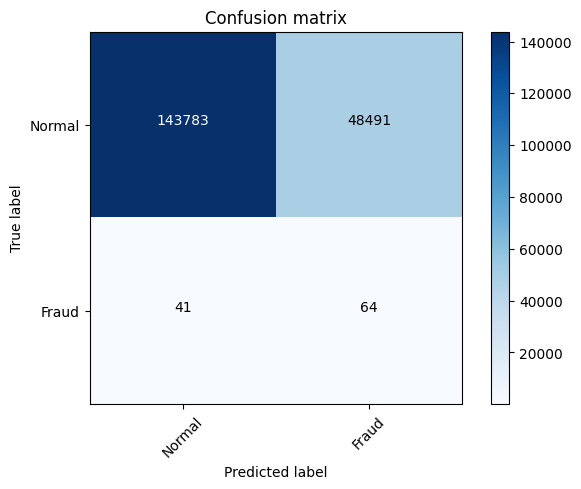

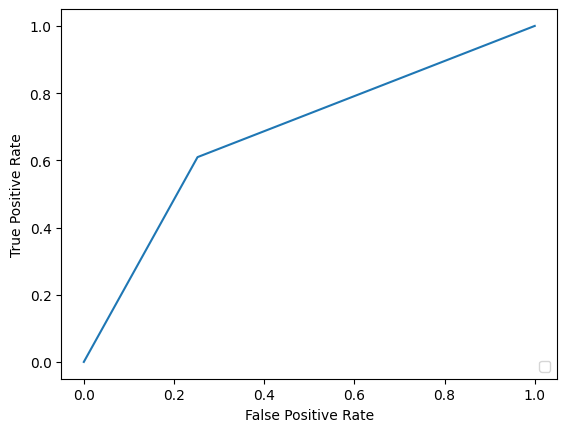

In [15]:
isofr_y_pred = isofr_model.predict(X_test)
res1 = list(map(lambda x: 1 if x==-1 else 0, isofr_y_pred))
isofr_y_pred = isofr_model.predict(X_test)

get_report(y_test, res1)

classification_report
------------------------------------
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    192274
       Fraud       0.00      0.00      0.00       105

    accuracy                           1.00    192379
   macro avg       0.50      0.50      0.50    192379
weighted avg       1.00      1.00      1.00    192379


recall_score
------------------------------------


C:\Users\melov\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melov\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melov\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

0.0

roc_auc_score
------------------------------------
0.5

confusion_matrix
------------------------------------
Confusion matrix, without normalization
[[192274      0]
 [   105      0]]
> Correct Predictions: 192274
> Wrong Predictions: 105


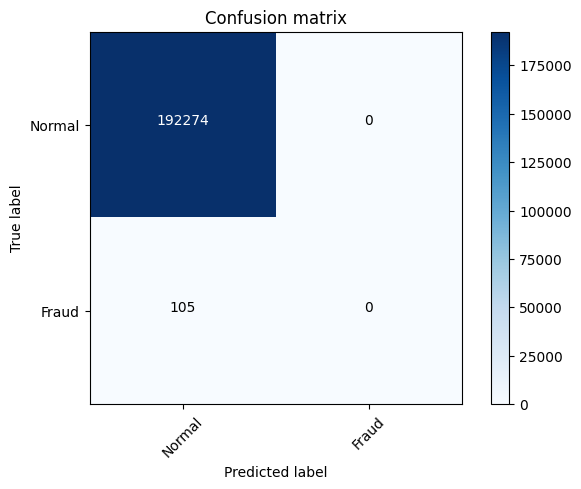

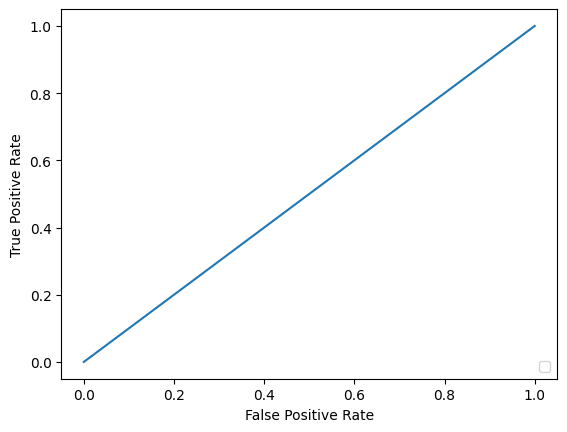

In [16]:
from collections import Counter
sgd_ocsvm_model = SGDOneClassSVM(random_state=42)
sgd_ocsvm_model.fit(X_train[y_train==0])

sgd_ocsvm_ypred_train = sgd_ocsvm_model.predict(X_train)
Counter(sgd_ocsvm_ypred_train)
sgd_ocsvm_ypred_test = sgd_ocsvm_model.predict(X_test)

res_ocsvm_test = list(map(lambda x: 1 if x==-1 else 0, sgd_ocsvm_ypred_test))

get_report(y_test, res_ocsvm_test)